In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from calendar import monthrange
import calendar
from glob import glob
import pickle
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# fp = '/scratch1/RDARCH/rda-ghpcs/Rey.Koki/SmokeViz_code/deep_learning/dataset_pointers/smokeviz_yr_split/SmokeViz.pkl'
fp  = '/scratch1/RDARCH/rda-ghpcs/Rey.Koki/SmokeViz_code/deep_learning/dataset_pointers/pseudo/pseudo.pkl'
with open(fp, 'rb') as handle:
    data_dict = pickle.load(handle)

### Sample count per density per year


In [3]:
train_yr = ['2018', '2019', '2020', '2021', '2024']
val_yr = ['2023']
test_yr = ['2022']
all_yr = (train_yr + val_yr + test_yr)
all_yr.sort()
num_yr = len(all_yr)
print(all_yr)

['2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [4]:
data_dict['train']['truth'][0]

'/scratch1/RDARCH/rda-ghpcs/Rey.Koki/PL2/truth/2018/Light/183/G16_s20181832300405_40.6_-121.94_40.tif'

In [5]:
truth_dir = '/scratch1/RDARCH/rda-ghpcs/Rey.Koki/PL2/truth/' #'/scratch1/RDARCH/rda-ghpcs/Rey.Koki/SmokeViz/truth/'
sample_counts = pd.DataFrame({'Light' : np.zeros(num_yr),
                              'Medium': np.zeros(num_yr),
                              'Heavy' : np.zeros(num_yr)},
                             index=all_yr)
for yr in sample_counts.index:
    for density in list(sample_counts):
        datenums = os.listdir("{}{}/{}/".format(truth_dir, yr, density))
        for dn in datenums:   
            num_samples =  len(os.listdir("{}{}/{}/{}/".format(truth_dir, yr, density, dn)))
            sample_counts.loc[yr, density] = sample_counts.loc[yr, density] + num_samples
print(sample_counts)

        Light  Medium   Heavy
2018  26635.0  4489.0  2291.0
2019  26249.0  6203.0  3202.0
2020  29163.0  7086.0  3634.0
2021  15783.0  5006.0  3747.0
2022  12725.0  5136.0  2363.0
2023  11124.0  5136.0  2963.0
2024   7076.0  2654.0  1007.0


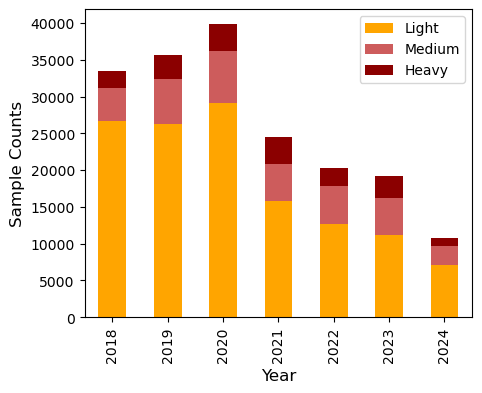

In [6]:
sample_counts.plot(figsize=(5,4),kind='bar', stacked=True, color=['orange', 'indianred', 'darkred'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sample Counts', fontsize=12)
plt.savefig('figures/sample_count_per_yr.png', bbox_inches='tight', dpi=300)

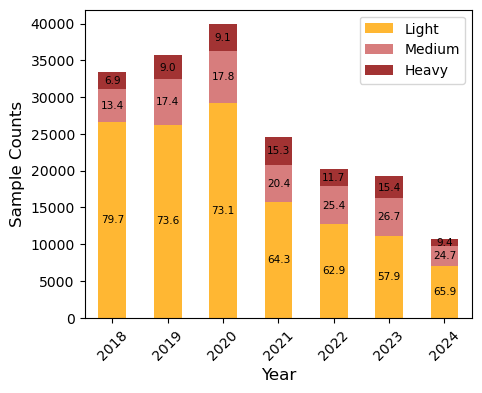

In [7]:
ax = sample_counts.plot(
    figsize=(5, 4), kind='bar', stacked=True, color=['orange', 'indianred', 'darkred'], alpha=0.8
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sample Counts', fontsize=12)

totals = sample_counts.sum(axis=1)  # Total per year
for i, (year, total) in enumerate(zip(all_yr, totals)):
    y_offset = 0  
    for category in sample_counts.columns:
        value = sample_counts.at[year, category]
        percentage = (value / total) * 100
        ax.text(
            i, 
            y_offset + value / 2,  
            f"{percentage:.1f}", 
            ha="center", 
            va="center", 
            fontsize=7.5, 
            color="black" 
        )
        y_offset += value 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig('figures/sample_count_per_yr_percentages.png', bbox_inches='tight', dpi=300)
plt.show()

### Sample Count Per Density Per Month of the Year 

In [8]:
month_counts = pd.DataFrame({'2018' : [0]*12, '2019' : [0]*12, '2020' : [0]*12, '2021' : [0]*12, '2022' : [0]*12, '2023' : [0]*12, '2024' : [0]*12},
                             index = list(range(1,13)))
for yr in list(month_counts):
    curr_dn = 0
    for month in month_counts.index:
        days = monthrange(int(yr), int(month))
        for day in range(1,days[1]+1):
            curr_dn += 1
            dn_str = str(curr_dn).zfill(3)
            num_dn_samples =  len(glob("{}{}/*/{}/*tif".format(truth_dir, yr, dn_str)))
            month_counts.loc[month, yr] += num_dn_samples

In [9]:
month_counts

,2018,2019,2020,2021,2022,2023,2024
1,2434,1877,3494,1411,2363,1405,652
2,1039,1675,4303,1799,2190,1715,1827
3,6340,4222,6590,3580,3358,2967,1117
4,6056,4258,5107,3990,2262,1575,1440
5,2882,3276,3892,2379,1321,1559,914
6,2675,2647,2636,2032,1265,2011,865
7,2585,2525,2538,2445,1068,1197,759
8,2612,2974,3098,1944,1503,1622,1258
9,2089,3250,1841,1344,1347,1412,706
10,2325,3598,2949,1312,2189,1800,1128


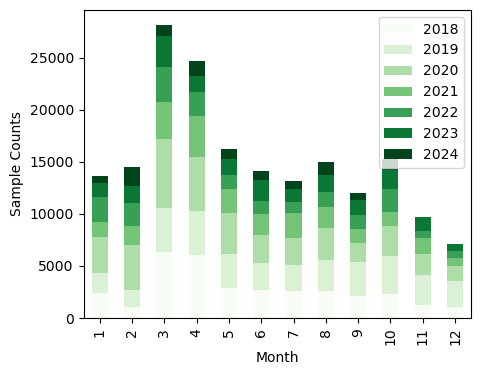

In [10]:
month_counts.plot(figsize=(5,4), kind='bar', stacked=True, cmap='Greens')
plt.xlabel('Month')
plt.ylabel('Sample Counts')
plt.savefig('figures/sample_count_per_month.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_3375557/3461078266.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2', len(month_counts.columns))


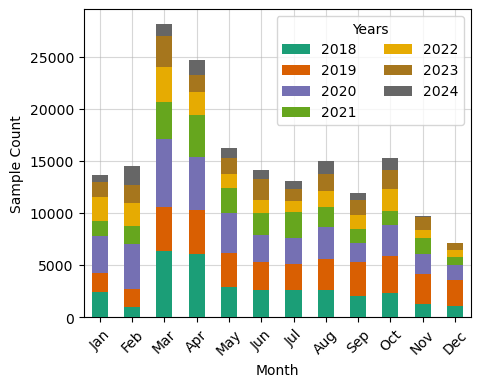

In [11]:
cmap = plt.cm.get_cmap('Dark2', len(month_counts.columns))  

month_counts.plot(
    figsize=(5, 4), 
    kind='bar', 
    stacked=True, 
    colormap=plt.cm.colors.ListedColormap(cmap.colors),
    zorder=3,
)
plt.xlabel('Month')
plt.ylabel('Sample Count')
plt.legend(title='Years', ncol=2, loc='upper right', 
           # bbox_to_anchor=(0.5, -0.15)
          )
plt.grid(True, alpha=0.5) 
plt.xticks(ticks=range(len(month_counts)), labels=[calendar.month_abbr[i] for i in range(1, 13)] , rotation=45)
plt.savefig('figures/sample_count_per_month.png', bbox_inches='tight', dpi=300)

### Sample count per area - US state and North American country

In [12]:
lat_lon_pkl = './geo_dependent/dict_lat_lon_fn_test.pkl'
with open(lat_lon_pkl, 'rb') as handle:
    lat_lon_dict = pickle.load(handle)
states = geopandas.read_file('./shape_files/states.shp')
countries = geopandas.read_file('./shape_files/NA_countries.shp')

lat_lon_df = pd.DataFrame(lat_lon_dict)
geometry= geopandas.points_from_xy(x=lat_lon_df['Longitude'],y=lat_lon_df['Latitude'], crs=states.crs)
gdf=geopandas.GeoDataFrame(lat_lon_df, geometry=geometry)

ERROR 1: PROJ: proj_create_from_database: Open of /scratch1/RDARCH/rda-ghpcs/Annabel.Wade/miniconda3/envs/smoke/share/proj failed


In [13]:
countries = countries[:2]

In [14]:
len(lat_lon_dict['Latitude']), len(lat_lon_dict['Longitude'])

(16855, 16855)

In [15]:
states_dict = {}
for idx, row in states.iterrows():                                                                                                                       
    state_dict = {row['shapeISO']: 0}
    states_dict.update(state_dict)
countries_dict = {}
for idx, row in countries.iterrows():  
    if not (row.shapeName == 'United States'):
        country_dict = {row['shapeISO']: 0}
        countries_dict.update(country_dict)

In [16]:
for idx, row in states.iterrows():
    states_dict[row['shapeISO']] = len(gdf.geometry.clip(row['geometry']))
for idx, row in countries.iterrows():
    countries_dict[row['shapeISO']] = len(gdf.geometry.clip(row['geometry']))


In [17]:
print(countries_dict)

{'CAN': 2086, 'MEX': 1651}


In [18]:
print(state_dict)

{'US-CT': 0}


In [19]:
def assign_state_smoke_count(states):    
    count = states_dict[states['shapeISO']]
    states['smoke_count'] = count                                                                                                                                         
    return states
states = states.apply(assign_state_smoke_count, axis=1)
def assign_country_smoke_count(countries):    
    count = countries_dict[countries['shapeISO']]
    countries['smoke_count'] = count                                                                                                                                         
    return countries
countries = countries.apply(assign_country_smoke_count, axis=1)

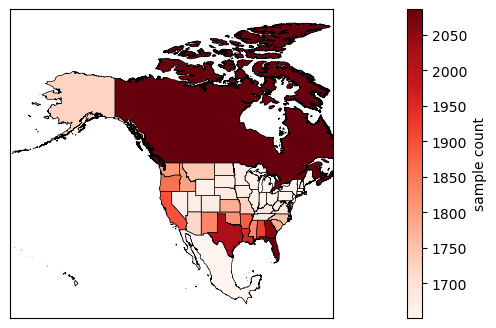

In [20]:
color = 'Reds'
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-.1)
states.plot(figsize=(5,4), column='smoke_count', cmap=color, edgecolor='black', linewidth=.5, ax=ax, legend=True, 
            cax=cax, legend_kwds={'label': "sample count",'orientation': "vertical"})
countries.plot(column='smoke_count', cmap=color, edgecolor='black', linewidth=.5, ax=ax, legend=True, 
               cax=cax, legend_kwds={'label': "sample count",'orientation': "vertical"})
ax.get_yaxis().set_visible(False)                                                                                                                        
ax.get_xaxis().set_visible(False)   
ax.set_xlim(-180,-60)
plt.savefig('figures/sample_count_per_state_CA_MX.png', bbox_inches='tight', dpi=300)                                                                           

plt.show()
#ax.set_title('Count of Smoke Annotations')                                                                                            
#plt.close()         

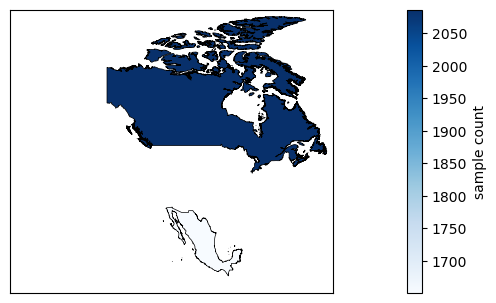

In [21]:
color = 'Blues'
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-.1)
countries.plot(column='smoke_count', cmap=color, edgecolor='black', linewidth=.5, ax=ax, legend=True, 
               cax=cax, legend_kwds={'label': "sample count",'orientation': "vertical"})
ax.get_yaxis().set_visible(False)                                                                                                                        
ax.get_xaxis().set_visible(False)   
ax.set_xlim(-180,-50)
ax.set_ylim(10,85)
plt.savefig('figures/sample_count_per_country.png', bbox_inches='tight',dpi=300)                                                                           

plt.show()

## Model Perfomance Statistics

### variations in model performance on testset over the year

how does IoU change based on month of year the data is taken from?

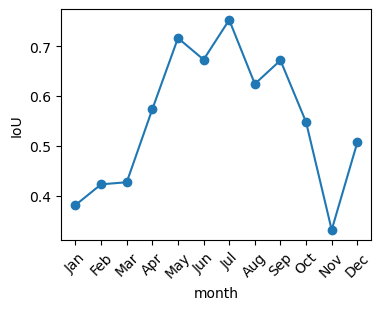

In [49]:
# logs/month_exp1.log
month_IoU = [0.3809, 0.4226, 0.4268, 0.5739, 0.7169, 0.6735, 0.7534, 0.6246, 0.6721, 0.5478, 0.3309, 0.5068]

fig = plt.figure(figsize=(4, 3))
plt.plot( list(range(1,13)), month_IoU, 'o-')
plt.xlabel('month')
# 
plt.ylabel('IoU')
plt.xticks(ticks=range(1,13), labels=[calendar.month_abbr[i] for i in range(1, 13)] , rotation=45)
plt.savefig('figures/IoU_per_month.png', bbox_inches='tight',dpi=300)                                                                           

plt.show()

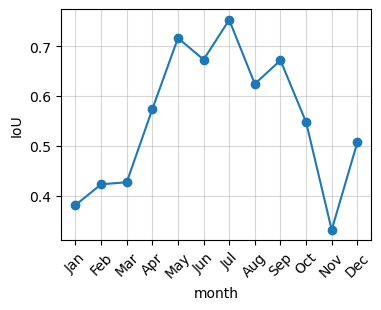

In [48]:
# logs/month_exp1.log
month_IoU = [0.3809, 0.4226, 0.4268, 0.5739, 0.7169, 0.6735, 0.7534, 0.6246, 0.6721, 0.5478, 0.3309, 0.5068]

fig = plt.figure(figsize=(4, 3))
plt.grid(alpha=0.5)
plt.plot( list(range(1,13)), month_IoU, 'o-')
plt.xlabel('month')

plt.ylabel('IoU')
plt.xticks(ticks=range(1,13), labels=[calendar.month_abbr[i] for i in range(1, 13)] , rotation=45)
plt.savefig('figures/IoU_per_month.png', bbox_inches='tight',dpi=300)                                                                           

plt.show()

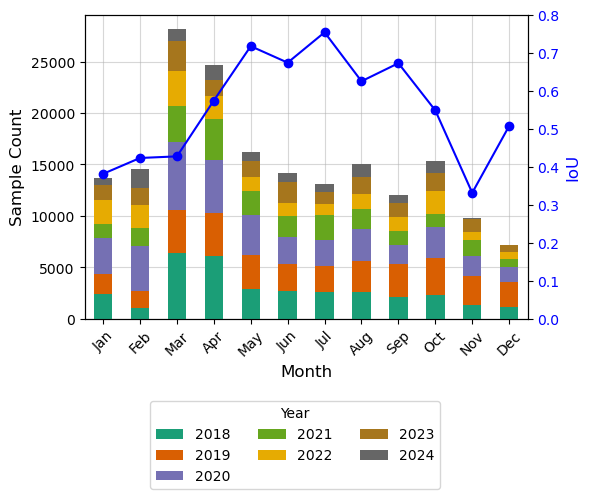

In [51]:
# logs/month_exp1.log
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.grid(alpha=0.5)
month_counts.plot(
    kind='bar',
    stacked=True,
    colormap=plt.cm.colors.ListedColormap(cmap.colors),
    ax=ax1, legend=False, zorder=3
)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Sample Count', fontsize=12)
ax1.set_xticks(range(len(month_counts)))
ax1.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)], rotation=45)

ax2 = ax1.twinx()
ax2.plot(range(len(month_IoU)), month_IoU, 'o-', color='blue')
ax2.set_ylabel('IoU', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, 0.8)

ax1.grid(True, alpha=0.5) 
fig.tight_layout()
fig.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 0), 
    ncol=3, 
    title='Year'
)

plt.savefig('figures/combined_plot.png', bbox_inches='tight', dpi=300)
plt.show()

### Geographical variations in model performance

we separate into 4 regions based on the mid-point (40, -100) and run the model on each sub-testset

In [45]:
# total_geo_counts = {'NW': 0, 'SW': 0, 'NE': 0, 'SE': 0}

# def count_section(lat, lon):
#     if lat >= 40 and lon <= -100:
#         total_geo_counts['NW']+=1
#     elif lat < 40 and lon <= -100:
#         total_geo_counts['SW']+=1
#     elif lat >= 40 and lon > -100:
#         total_geo_counts['NE']+=1
#     elif lat < 40 and lon > -100:
#         total_geo_counts['SE']+=1

# for idx, row in lat_lon_df.iterrows():
#     count_section(row['Latitude'], row['Longitude'])


geo region testing results:

Region: NW
OVERALL HIGH DENSITY SMOKE GIVES: 0.38945770263671875 IoU
OVERALL MEDIUM DENSITY SMOKE GIVES: 0.5511676073074341 IoU
OVERALL LOW DENSITY SMOKE GIVES: 0.7252989411354065 IoU
OVERALL OVER ALL DENSITY GIVES: 0.6418484449386597
 IoU
Region: SW
OVERALL HIGH DENSITY SMOKE GIVES: 0.38269156217575073 IoU
OVERALL MEDIUM DENSITY SMOKE GIVES: 0.4845900237560272 IoU
OVERALL LOW DENSITY SMOKE GIVES: 0.6566712260246277 IoU
OVERALL OVER ALL DENSITY GIVES: 0.6070088744163513 IoU

Region: NE
OVERALL HIGH DENSITY SMOKE GIVES: 0.3213174343109131 IoU
OVERALL MEDIUM DENSITY SMOKE GIVES: 0.5629339814186096 IoU
OVERALL LOW DENSITY SMOKE GIVES: 0.7822866439819336 IoU
OVERALL OVER ALL DENSITY GIVES: 0.6811216473579407 IoU

Region: SE
OVERALL HIGH DENSITY SMOKE GIVES: 0.29290875792503357 IoU
OVERALL MEDIUM DENSITY SMOKE GIVES: 0.36703330278396606 IoU
OVERALL LOW DENSITY SMOKE GIVES: 0.6097280979156494 IoU
OVERALL OVER ALL DENSITY GIVES: 0.5581473112106323 IoU IoU IoU IoU IoU

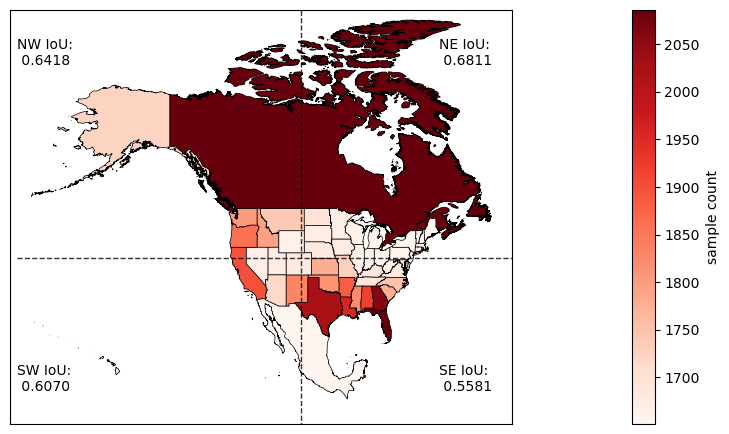

In [42]:
color = 'Reds'
fig, ax = plt.subplots(1, 1, figsize=(10,6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-.1)

states.plot(figsize=(5, 4), column='smoke_count', cmap=color, edgecolor='black', linewidth=0.5, ax=ax, legend=True,
            cax=cax, legend_kwds={'label': "sample count", 'orientation': "vertical"})
countries.plot(column='smoke_count', cmap=color, edgecolor='black', linewidth=.5, ax=ax, legend=True, 
               cax=cax, legend_kwds={'label': "sample count",'orientation': "vertical"})
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

ax.plot([-183, -45], [40, 40], 'k--', lw=1, alpha=0.8)  
ax.plot([-105, -105], [-90, 90], 'k--', lw=1,  alpha=0.8) 

region_text = {
    'NW': (0.6418, -183, 75),
    'SW': (0.6070, -183, 16),
    'NE': (0.6811, -67, 75),
    'SE': (0.5581, -67, 16)
}

for region, (iou, lon, lat) in region_text.items():
    ax.text(lon, lat, f'{region} IoU:\n {iou:.4f}', fontsize=10, ha='left', color='black')
ax.set_xlim(-185, -47)  # Longitude limits
ax.set_ylim(10, 85)     # Latitude limits

plt.savefig('figures/sample_count_per_state_with_regions.png', bbox_inches='tight', dpi=300)
plt.show()


| Geographical region | Overall testset IoU | Number test samples | Total number of samples |
| -------- | ------- |  ------- |  ------- | 
| NW | 0.6418 | 4177 | 32792 |
| SW | 0.6070 | 1937 | 34267 |
| NE | 0.6811 | 1133 | 13342 |
| SE | 0.5581 | 12977 | 103271 |

### Satellite source variation in model performance

Are there variations in model performance depending on which satellite the data is sourced from

In [38]:
sat_counts = {'G16' : 0, 'G17': 0 }
densities = ['Heavy', 'Medium', 'Light']
for density in densities:
    sat_counts['G16']+=len(glob('{}/*/{}/*/G16_*.tif'.format(truth_dir,density)))
    sat_counts['G17']+=len(glob('{}/*/{}/*/G17_*.tif'.format(truth_dir,density)))
    sat_counts['G17']+=len(glob('{}/*/{}/*/G18_*.tif'.format(truth_dir,density)))

print('all',sat_counts)
sat_counts_test = {'G16' : 0, 'G17': 0 }
for density in densities:
    sat_counts_test['G16']+=len(glob('{}/2022/{}/*/G16_*.tif'.format(truth_dir,density)))
    sat_counts_test['G17']+=len(glob('{}/2022/{}/*/G17_*.tif'.format(truth_dir,density)))
    sat_counts_test['G17']+=len(glob('{}/2022/{}/*/G18_*.tif'.format(truth_dir,density)))

print('test', sat_counts_test)

# Number test samples
# G16:  11472
# G17:  5383

all {'G16': 143640, 'G17': 40032}
test {'G16': 13869, 'G17': 6355}



| Satellite | Overall Test Set IoU | Number Test Samples | Total number of samples in full dataset|
| -------- | ------- |  ------- |  ------- | 
| GOES-WEST | 0.6725 | 6355 | 40032 |
| GOES-EAST | 0.5523 | 13869 | 143640 |

### Temporal proximity to sunrise/sunset

| time difference | Mie DS IoU | PL DS IoU|
| -------- | ------- | ------- |
| <2 hours  | 0.412 | 0.546 |
| >2 hours  |  0.411 | 0.538 |

shows the overall IoU values for the Mie or pseudo-labeled test dataset samples that are within or outside 2 hours of either sunrise or sunset.

### Sample count proximity to sunrise/sunset for Mie vs pseudo-label derived datasets

| time difference | Mie DS | PL DS |
| -------- | ------- | ------- |
| <2 hours  | 3923 (63%) | 3436 (46%) |
| >2 hours  | 2280 (37%) | 4038 (54%) |

shows the split on if the Mie or pseudo-labeled test dataset samples that are within or outside 2 hours of either sunrise or sunset. The Mie dataset is skewed towards the nighttime boundaries. 
